In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import linregress
from datetime import datetime
import matplotlib
import time
import calendar
import gmaps

from r_api import g_key


In [2]:
# Create a reference the CSV file desired
SARS_csv = "../group3/SARS_data/sars_2003_complete_dataset_clean.csv"

# Read the CSV into a Pandas DataFrame
SARS_df = pd.read_csv(SARS_csv)

SARS_df

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


In [3]:
grouped_SARS = SARS_df.groupby('Date')
cumulative_SARS = grouped_SARS.sum()

SARS_summary = pd.DataFrame({
                             "Case Count": cumulative_SARS['Cumulative number of case(s)'],
                             "Death Count": cumulative_SARS['Number of deaths'],
                             "Recovered Count": cumulative_SARS['Number recovered']
                            })

SARS_summary = SARS_summary.reset_index()
SARS_summary

,Date,Case Count,Death Count,Recovered Count
0,2003-03-17,167,4,0
1,2003-03-18,219,4,0
2,2003-03-19,264,9,0
3,2003-03-20,306,10,0
4,2003-03-21,350,10,0
...,...,...,...,...
91,2003-07-07,8434,812,7426
92,2003-07-08,8431,812,7428
93,2003-07-09,8431,812,7438
94,2003-07-10,8432,812,7444


In [4]:
# Combine Chinese Data
SARS_china = SARS_df.replace(to_replace=['Hong Kong SAR, China', 'Macao SAR, China', 'Taiwan, China'],
                value='China')
SARS_final = SARS_china.replace(to_replace=['Viet Nam'],
                value='Vietnam')

country_totals = SARS_final[SARS_final['Date'] == max(SARS_final['Date'])].reset_index()
country_totals

,index,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2507,2003-07-11,Brazil,1,0,1
1,2508,2003-07-11,Canada,250,38,194
2,2509,2003-07-11,China,5327,348,4941
3,2510,2003-07-11,China,1755,298,1433
4,2511,2003-07-11,China,1,0,1
5,2512,2003-07-11,China,671,84,507
6,2513,2003-07-11,Colombia,1,0,1
7,2514,2003-07-11,Finland,1,0,1
8,2515,2003-07-11,France,7,1,6
9,2516,2003-07-11,Germany,10,0,9


In [5]:
grouped_countries = country_totals.groupby('Country')
grouped_countries = grouped_countries.sum()
grouped_countries = grouped_countries.drop(['index'], axis=1)

country_summary = pd.DataFrame({
                             "Case Count": grouped_countries['Cumulative number of case(s)'],
                             "Death Count": grouped_countries['Number of deaths'],
                             "Recovered Count": grouped_countries['Number recovered'],
                             "Mortality Rate": 100*(grouped_countries['Number of deaths']/grouped_countries['Cumulative number of case(s)'])
                            })

country_summary['Mortality Rate'] = country_summary['Mortality Rate'].map("{:.2f}%".format)

country_summary

,Case Count,Death Count,Recovered Count,Mortality Rate
Country,,,,
Brazil,1,0,1,0.00%
Canada,250,38,194,15.20%
China,7754,730,6882,9.41%
Colombia,1,0,1,0.00%
Finland,1,0,1,0.00%
France,7,1,6,14.29%
Germany,10,0,9,0.00%
India,3,0,3,0.00%
Indonesia,2,0,2,0.00%


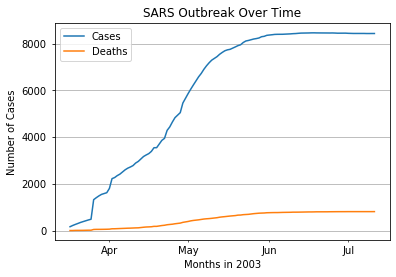

In [6]:
summed_dates = []
for row in SARS_summary['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, SARS_summary['Case Count'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, SARS_summary['Death Count'], label="Deaths")

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)

plt.title("SARS Outbreak Over Time")
plt.xlabel("Months in 2003")
plt.ylabel("Number of Cases")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid()
plt.show()


In [7]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
                value='Republic of Ireland')

countries_lat_lng = pd.merge(country_summary, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Case Count', 'Death Count', 'Recovered Count', 'Mortality Rate', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Case Count'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
SARS_cases = country_summary['Case Count'].sum()

SARS_deaths = country_summary['Death Count'].sum()

final_summary = pd.DataFrame({'Cases': [SARS_cases],
                              'Deaths': [SARS_deaths]
                            })

final_summary['Mortality Rate'] = 100*(final_summary['Deaths']/final_summary['Cases'])
final_summary['Mortality Rate'] = final_summary['Mortality Rate'].map("{:.2f}%".format)


final_summary

,Cases,Deaths,Mortality Rate
0,8432,813,9.64%


In [9]:
daily_SARS_cases = [SARS_summary.iloc[0,1]]
daily_SARS_deaths = [SARS_summary.iloc[0,2]]
for x in range(1,len(SARS_summary)):
    daily_case = SARS_summary.iloc[x,1] - SARS_summary.iloc[x-1,1]
    daily_SARS_cases.append(daily_case)
    daily_deaths = SARS_summary.iloc[x,2] - SARS_summary.iloc[x-1,2]
    daily_SARS_deaths.append(daily_deaths)

daily_SARS_cases
daily_SARS_deaths

SARS_summary['Daily Cases'] = daily_SARS_cases
SARS_summary['Daily Deaths'] = daily_SARS_deaths

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths
0,2003-03-17,167,4,0,167,4
1,2003-03-18,219,4,0,52,0
2,2003-03-19,264,9,0,45,5
3,2003-03-20,306,10,0,42,1
4,2003-03-21,350,10,0,44,0
...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0
92,2003-07-08,8431,812,7428,-3,0
93,2003-07-09,8431,812,7438,0,0
94,2003-07-10,8432,812,7444,1,0


In [10]:
SARS_summary['Month and Year'] = pd.to_datetime(SARS_summary['Date']).dt.to_period('M')

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths,Month and Year
0,2003-03-17,167,4,0,167,4,2003-03
1,2003-03-18,219,4,0,52,0,2003-03
2,2003-03-19,264,9,0,45,5,2003-03
3,2003-03-20,306,10,0,42,1,2003-03
4,2003-03-21,350,10,0,44,0,2003-03
...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0,2003-07
92,2003-07-08,8431,812,7428,-3,0,2003-07
93,2003-07-09,8431,812,7438,0,0,2003-07
94,2003-07-10,8432,812,7444,1,0,2003-07


In [11]:
monthly_grouping = SARS_summary.groupby('Month and Year')
monthly_grouping = monthly_grouping.sum()
monthly_grouping

monthly_sars_summary = pd.DataFrame({'Monthly Cases': monthly_grouping['Daily Cases'],
                                     'Monthly Deaths': monthly_grouping['Daily Deaths'],
                                     })

monthly_sars_summary = monthly_sars_summary.reset_index()
monthly_sars_summary['Month'] = monthly_sars_summary['Month and Year'].dt.month
monthly_sars_summary['Year'] = monthly_sars_summary['Month and Year'].dt.year

monthly_sars_summary


,Month and Year,Monthly Cases,Monthly Deaths,Month,Year
0,2003-03,1622,58,3,2003
1,2003-04,4037,314,4,2003
2,2003-05,2695,392,5,2003
3,2003-06,93,47,6,2003
4,2003-07,-15,2,7,2003


In [12]:
# monthly_sars_summary.plot.line()
# plt.show()

In [13]:
sars_flight_df = pd.read_csv('SARS_data/sars_flight_data_2002-2004.csv')

In [14]:
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,213627,0,6151,MU,China Eastern Airlines,14309,PVG,CN,China,14771,SFO,US,United States,2002,10
1,0,4055,0,5494,CA,Air China,14066,PEK,CN,China,14057,PDX,US,United States,2002,12
2,0,19826,0,6754,FX,Federal Express Corporation,14066,PEK,CN,China,12339,IND,US,United States,2002,12
3,0,1195674,0,7773,CZ,China Southern Airlines,13930,ORD,US,United States,15113,SZX,CN,China,2002,12
4,0,790062,0,6580,CA,Air China,14066,PEK,CN,China,13930,ORD,US,United States,2002,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [15]:
# Drop the last few rows which have null values
sars_flight_df = sars_flight_df.dropna(how='any')
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,213627,0,6151,MU,China Eastern Airlines,14309,PVG,CN,China,14771,SFO,US,United States,2002,10
1,0,4055,0,5494,CA,Air China,14066,PEK,CN,China,14057,PDX,US,United States,2002,12
2,0,19826,0,6754,FX,Federal Express Corporation,14066,PEK,CN,China,12339,IND,US,United States,2002,12
3,0,1195674,0,7773,CZ,China Southern Airlines,13930,ORD,US,United States,15113,SZX,CN,China,2002,12
4,0,790062,0,6580,CA,Air China,14066,PEK,CN,China,13930,ORD,US,United States,2002,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [16]:
# Drop the rows which have totals for each year
sars_flight_df = sars_flight_df[sars_flight_df['PASSENGERS'] != 0]
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
498,2,0,0,7384,NW,Northwest Airlines Inc.,11618,EWR,US,United States,14309,PVG,CN,China,2002,6
499,3,0,3735,6840,UA,United Air Lines Inc.,12478,JFK,US,United States,14066,PEK,CN,China,2002,1
500,3,0,0,6840,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,3
501,5,0,0,6838,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,12
502,5,0,0,6933,NW,Northwest Airlines Inc.,11278,DCA,US,United States,14066,PEK,CN,China,2002,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [17]:
# columns = flight_data_df.columns
# for column in columns:
#     flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

In [18]:
# sars_flight_df['YEAR'] = sars_flight_df['YEAR'].astype(int)
# sars_flight_df['MONTH'] = sars_flight_df['MONTH'].astype(int)

In [19]:
Date = []
for y, m in zip(sars_flight_df.YEAR, sars_flight_df.MONTH):
    Date.append(datetime(y, m, 1))

sars_flight_df['Date'] = Date

sars_flight_df

/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH,Date
498,2,0,0,7384,NW,Northwest Airlines Inc.,11618,EWR,US,United States,14309,PVG,CN,China,2002,6,2002-06-01
499,3,0,3735,6840,UA,United Air Lines Inc.,12478,JFK,US,United States,14066,PEK,CN,China,2002,1,2002-01-01
500,3,0,0,6840,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,3,2002-03-01
501,5,0,0,6838,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,12,2002-12-01
502,5,0,0,6933,NW,Northwest Airlines Inc.,11278,DCA,US,United States,14066,PEK,CN,China,2002,6,2002-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12,2004-12-01
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8,2004-08-01
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5,2004-05-01
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6,2004-06-01


In [51]:
grouped_sars_flights = sars_flight_df.groupby('Date')
sars_flights_by_date = grouped_sars_flights.count()
sars_flights_by_date = sars_flights_by_date.reset_index()
sars_flights_by_date['MONTH'] = sars_flights_by_date['Date'].dt.month
sars_flights_by_date['YEAR'] = sars_flights_by_date['Date'].dt.year

sars_flights_summary = pd.DataFrame({'Date': sars_flights_by_date['Date'],
                                     'Flights per Month': sars_flights_by_date['PASSENGERS'],
                                     'Month': sars_flights_by_date['MONTH'],
                                     'Year': sars_flights_by_date['YEAR']
                                    })

sars_flights_summary

,Date,Flights per Month,Month,Year
0,2002-01-01,702,1,2002
1,2002-02-01,694,2,2002
2,2002-03-01,677,3,2002
3,2002-04-01,824,4,2002
4,2002-05-01,692,5,2002
5,2002-06-01,787,6,2002
6,2002-07-01,635,7,2002
7,2002-08-01,641,8,2002
8,2002-09-01,663,9,2002
9,2002-10-01,770,10,2002


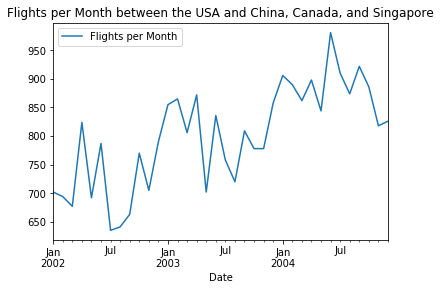

In [52]:
ax = plt.gca()
sars_flights_summary.plot.line(x ='Date', y='Flights per Month',ax=ax)
plt.title('Flights per Month between the USA and China, Canada, and Singapore')
plt.show()

In [53]:
sars_flight_data = pd.merge(sars_flights_summary, monthly_sars_summary, on=['Month', 'Year'])

sars_flight_data

,Date,Flights per Month,Month,Year,Month and Year,Monthly Cases,Monthly Deaths
0,2003-03-01,806,3,2003,2003-03,1622,58
1,2003-04-01,872,4,2003,2003-04,4037,314
2,2003-05-01,702,5,2003,2003-05,2695,392
3,2003-06-01,836,6,2003,2003-06,93,47
4,2003-07-01,758,7,2003,2003-07,-15,2


The r-squared is: 0.18240176997220128


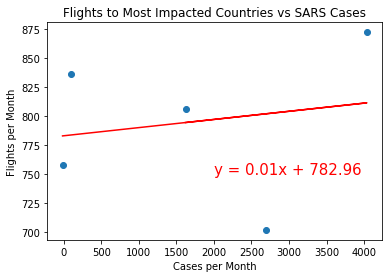

In [54]:
#run scatter plot and calculate r square
x_values = sars_flight_data['Monthly Cases']
y_values = sars_flight_data['Flights per Month']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,750),fontsize=15,color="red")
plt.xlabel('Cases per Month')
plt.ylabel('Flights per Month')
plt.title("Flights to Most Impacted Countries vs SARS Cases")
print(f"The r-squared is: {rvalue}")
plt.show()


In [55]:
#create average dataframe
avg_flight_df = sars_flights_summary.groupby(['Month']).mean()

#drop Year columns
del avg_flight_df['Year']

avg_flight_df.head()

,Flights per Month
Month,
1,821.000000
2,816.333333
3,781.666667
4,864.666667
5,746.000000


In [56]:
# #merge usa flight and flu data
# merged_df = pd.merge(flight_data_df, usa_df, on = ['Year', 'Month'], how="inner")

#do a second merge to add average data frame
flights_w_avg = pd.merge(sars_flight_data, avg_flight_df, on = 'Month', how = "inner", suffixes = ("", "_AVG"))

flights_w_avg

,Date,Flights per Month,Month,Year,Month and Year,Monthly Cases,Monthly Deaths,Flights per Month_AVG
0,2003-03-01,806,3,2003,2003-03,1622,58,781.666667
1,2003-04-01,872,4,2003,2003-04,4037,314,864.666667
2,2003-05-01,702,5,2003,2003-05,2695,392,746.000000
3,2003-06-01,836,6,2003,2003-06,93,47,868.000000
4,2003-07-01,758,7,2003,2003-07,-15,2,767.666667


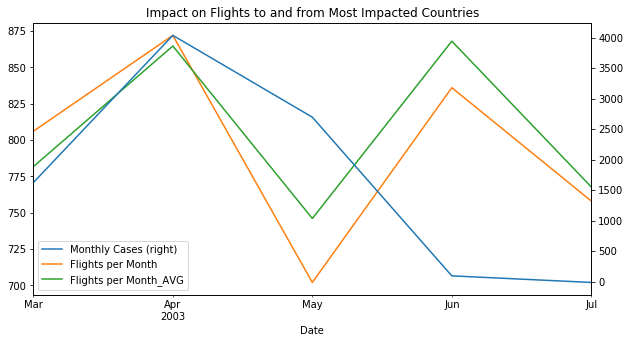

In [57]:
plt.figure(figsize = (10,5))
ax = plt.gca()

flights_w_avg.plot.line(x='Date', y='Monthly Cases', ax=ax, secondary_y = True)
flights_w_avg.plot.line(x='Date', y='Flights per Month', ax=ax)
flights_w_avg.plot.line(x='Date', y='Flights per Month_AVG', ax=ax)

plt.title("Impact on Flights to and from Most Impacted Countries")
plt.xlabel("Date")
plt.show()